# Decision Tree

In [2]:
!pip install graphviz

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

C:\Users\Students\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data['Name'].value_counts()

Brown, Mr. Thomas William Solomon                    1
Doling, Mrs. John T (Ada Julia Bone)                 1
Barber, Miss. Ellen "Nellie"                         1
Meyer, Mr. August                                    1
Graham, Mr. George Edward                            1
Stoytcheff, Mr. Ilia                                 1
O'Connell, Mr. Patrick D                             1
Lindqvist, Mr. Eino William                          1
Lam, Mr. Len                                         1
Aubart, Mme. Leontine Pauline                        1
Hassab, Mr. Hammad                                   1
Moubarek, Master. Gerios                             1
Birkeland, Mr. Hans Martin Monsen                    1
Boulos, Mrs. Joseph (Sultana)                        1
Abbing, Mr. Anthony                                  1
Vander Planke, Miss. Augusta Maria                   1
Taussig, Miss. Ruth                                  1
Elias, Mr. Joseph Jr                                 1
McCormack,

In [16]:
data['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
3101295              6
347088               6
382652               5
S.O.C. 14879         5
349909               4
113760               4
W./C. 6608           4
PC 17757             4
LINE                 4
113781               4
4133                 4
2666                 4
19950                4
17421                4
347077               4
230080               3
SC/Paris 2123        3
PC 17572             3
13502                3
239853               3
363291               3
248727               3
110152               3
35273                3
F.C.C. 13529         3
110413               3
                    ..
F.C.C. 13528         1
111320               1
113784               1
29751                1
349212               1
3101276              1
2003                 1
C.A. 31026           1
240929               1
112053               1
STON/O 2. 3101289    1
C.A. 18723           1
STON/O 2. 3

In [17]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [18]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [22]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [26]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],  axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Dummy variables

In [27]:
dummy_pclass = pd.get_dummies(data['Pclass'], prefix='pc', drop_first=True)
dummy_pclass.head()

,pc_2,pc_3
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


In [28]:
dummy_sex = pd.get_dummies(data['Sex'], prefix='sex', drop_first=True)
dummy_sex.head()

,sex_male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [29]:
dummy_embarked = pd.get_dummies(data['Embarked'], prefix='embarked', drop_first=True)
dummy_embarked.head()

,embarked_Q,embarked_S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [30]:
data = data.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [39]:
data_final = pd.concat([data, dummy_pclass, dummy_sex, dummy_embarked], axis=1)
data_final.head()

,Survived,Age,SibSp,Parch,Fare,pc_2,pc_3,sex_male,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0


# Missing values

In [40]:
data_final['Age'].fillna(data_final['Age'].mean(), inplace = True)
data_final.describe()

,Survived,Age,SibSp,Parch,Fare,pc_2,pc_3,sex_male,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.206510,0.551066,0.647587,0.086420,0.722783
std,0.486592,13.002015,1.102743,0.806057,49.693429,0.405028,0.497665,0.477990,0.281141,0.447876
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


# Model training and deploy

In [41]:
data_final.head()

,Survived,Age,SibSp,Parch,Fare,pc_2,pc_3,sex_male,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0


In [43]:
X = data_final.iloc[:, 1:].values
y = data_final.iloc[:, 0].values

In [44]:
X.shape, y.shape

((891, 9), (891,))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [60]:
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.981742
accuracy on test set: 0.793296


One possible way is to stop building the tree after a certain depth has been reached. we set max_depth=4, meaning only four consecutive questions can be asked.

In [71]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.873596
accuracy on test set: 0.826816


## Analyzing Decision Tree

In [1]:
export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

NameError: name 'export_graphviz' is not defined

In [14]:
with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Feature Importance in trees

In [61]:
tree.feature_importances_

array([  2.68186681e-01,   6.06787228e-02,   3.20498738e-02,
         2.44648760e-01,   5.15295738e-03,   7.58209957e-02,
         3.07381788e-01,   1.72744994e-04,   5.90747536e-03])

In [64]:
%matplotlib inline

(0, 1)

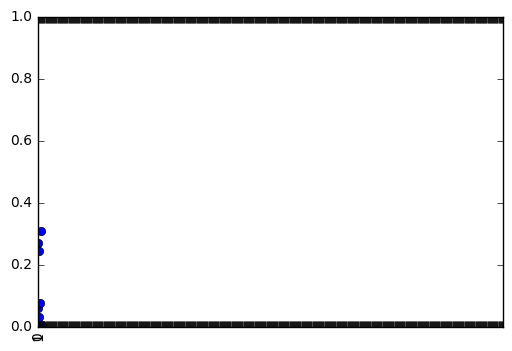

In [65]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(data_final.shape[0]), data_final['Survived'].unique(), rotation=90)


plt.ylim(0, 1)

In [14]:
cancer.data.shape[1]

30